# 第9章 教師なし学習（1）
## 9.1 2次元入力データ

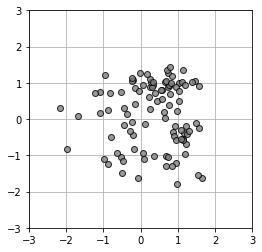

In [2]:
# リスト 9-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データ生成 --------------------------------------
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])    # 分布の中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  # 分布の分散
Pi = np.array([0.4, 0.8, 1])    # 累積確率
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])

# データの図示 ------------------------------------
def show_data(x):
    plt.plot(x[:, 0], x[:, 1], linestyle='none', marker='o', markersize=6, markeredgecolor='black', color='gray', alpha=0.8)
    plt.grid(True)

# メイン ------------------------------------------
plt.figure(1, figsize=(4, 4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X=X, X_range0=X_range0, X_range1=X_range1)

## 9.2 K-means法

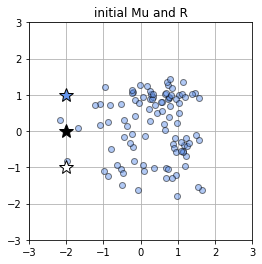

In [4]:
# リスト 9-1-(2)
# MuとRの初期化 -----------------------------------
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]

# リスト 9-1-(3)
# データの図示関数 ---------------------------------
def show_prm(x, r, mu, col):
    for k in range(K):
        # データ分布の描写
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1], marker='o', markerfacecolor=X_col[k], markeredgecolor='k', markersize=6, alpha=0.5, linestyle='none')
        # データの平均を「星マーク」で描写
        plt.plot(mu[k, 0], mu[k, 1], marker='*', markerfacecolor=X_col[k], markeredgecolor='k', markersize=15, markeredgewidth=1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

# メイン ------------------------------------------
plt.figure(figsize=(4, 4))
R = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()

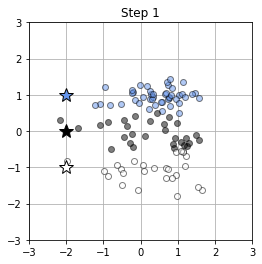

In [5]:
# リスト 9-1-(4)
# rを決める（Step1） ------------------------------
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2
        r[n, np.argmin(wk)] = 1
    return r

# メイン ------------------------------------------
plt.figure(figsize=(4, 4))
R = step1_kmeans(X[:, 0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt.title('Step 1')
plt.show()

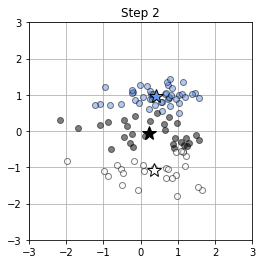

In [6]:
# リスト 9-1-(5)
# Muを決める（Step2） ------------------------------
def step2_kmeans(x0, x1, r):
    mu = np.zeros((K, 2))
    for k in range(K):
        mu[k, 0] = np.sum(r[:, k] * x0) / np.sum(r[:, k])
        mu[k, 1] = np.sum(r[:, k] * x1) / np.sum(r[:, k])
    return mu

# メイン ------------------------------------------
plt.figure(figsize=(4, 4))
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step 2')
plt.show()

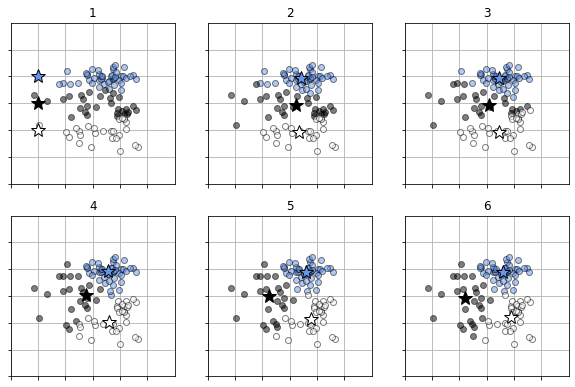

In [7]:
# リスト 9-1-(6)
plt.figure(1, figsize=(10, 6.5))
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
max_it = 6  # 繰り返しの回数
for it in range(0, max_it):
    plt.subplot(2, 3, it + 1)
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    show_prm(X, R, Mu, X_col)
    plt.title('{0:d}'.format(it + 1))
    plt.xticks(range(X_range0[0], X_range0[1]), '')
    plt.yticks(range(X_range1[0], X_range1[1]), '')
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

===9-1-(7)===
771.7091170334878
===9-1-(8)===
[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


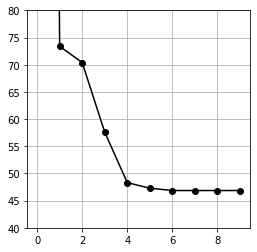

In [9]:
# リスト 9-1-(7)
# 目的関数 ----------------------------------------
def distortion_measure(x0, x1, r, mu):
    # 入力は2次元に限っている
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J = J + r[n, k] * ((x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2)
    return J

# MuとRの初期化 -----------------------------------
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
print('===9-1-(7)===')
print(distortion_measure(X[:, 0], X[:, 1], R, Mu))

# リスト 9-1-(8)
# MuとRの初期化 -----------------------------------
N = X.shape[0]
K = 3
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it) # 歪み尺度の計算結果を入れる
for it in range(0, max_it):  # K-means法
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    DM[it] = distortion_measure(X[:, 0], X[:, 1], R, Mu)    # 歪み尺度
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
print('===9-1-(8)===')
print(np.round(DM, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(DM, color='black', linestyle='-', marker='o')
plt.ylim(40, 80)
plt.grid(True)
plt.show()